## Partial Autocorrelations (pacf) - v2 - using default plot of statsmodels
Instead of a custom graph of plotly

Following the same logic using with plotly, the return of the function is the figure

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('/')[:-1]
root_path = '/'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  /Users/joseortega/Documents/GitHub/exploratory-data-analysis-ds


### 0. Package and load data
**Dataset: Tensorflow climate**

In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [3]:
# get data
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

# read data
data = pd.read_csv(csv_path)

# transform index into datetime format
index_datetime = pd.to_datetime(data.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

# set datetime as index
data.set_index(index_datetime, inplace =  True)

In [4]:
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
# sampling to example
data = data[0:1000]

In [6]:
data.shape

(1000, 14)

## Individual pacf

### 1. codes to generate EDA
Classic Plot of PACF
USING STATS MODELS:
- **plot_pacf (plot pacf)**

  tsaplots.plot_pacf(data[feature_example], lags=40)

- **sm.tsa.pacf (calculate pacf)**

  sm.tsa.pacf(dta.values.squeeze(), alpha=0.05, nlags = 40)

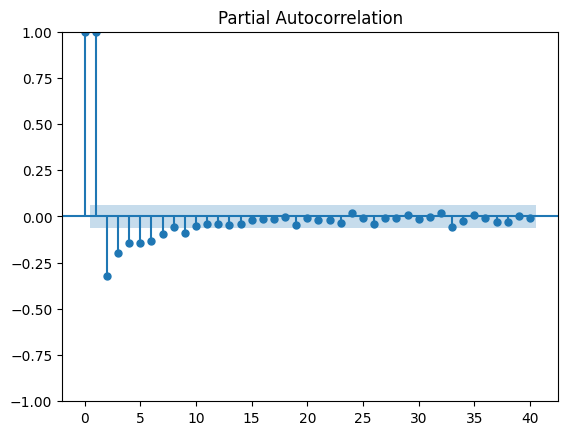

In [7]:
# Plotting autocorrelations - example - statsmodel
feature_example = data.columns.tolist()[0]

fig = tsaplots.plot_pacf(data[feature_example], lags=40, method="ywm")
plt.show()

In [8]:
pacf, confint = sm.tsa.pacf(data[feature_example], alpha=0.05, nlags = 40, method="ywm")

In [9]:
pacf

array([ 1.        ,  0.99965888, -0.32317944, -0.1979533 , -0.14082787,
       -0.14200044, -0.13449353, -0.09690494, -0.05848072, -0.09031897,
       -0.05221976, -0.03990343, -0.0426326 , -0.04766017, -0.04046184,
       -0.01940706, -0.01159987, -0.01215238, -0.00438935, -0.04394061,
       -0.00635988, -0.01819499, -0.01988782, -0.03494816,  0.01976241,
       -0.01041797, -0.03842443, -0.00646016, -0.01086736,  0.00794904,
       -0.01346091, -0.00108015,  0.01912179, -0.05518353, -0.02510864,
        0.00729733, -0.00846211, -0.0298473 , -0.02803992,  0.00189266,
       -0.01044503])

In [10]:
confint

array([[ 1.        ,  1.        ],
       [ 0.93767937,  1.06163838],
       [-0.38515894, -0.26119994],
       [-0.2599328 , -0.1359738 ],
       [-0.20280738, -0.07884837],
       [-0.20397994, -0.08002094],
       [-0.19647303, -0.07251402],
       [-0.15888444, -0.03492544],
       [-0.12046022,  0.00349878],
       [-0.15229847, -0.02833947],
       [-0.11419926,  0.00975974],
       [-0.10188293,  0.02207608],
       [-0.1046121 ,  0.0193469 ],
       [-0.10963967,  0.01431934],
       [-0.10244135,  0.02151766],
       [-0.08138657,  0.04257244],
       [-0.07357937,  0.05037964],
       [-0.07413188,  0.04982713],
       [-0.06636885,  0.05759016],
       [-0.10592011,  0.01803889],
       [-0.06833938,  0.05561962],
       [-0.0801745 ,  0.04378451],
       [-0.08186733,  0.04209168],
       [-0.09692767,  0.02703134],
       [-0.04221709,  0.08174191],
       [-0.07239747,  0.05156154],
       [-0.10040393,  0.02355507],
       [-0.06843967,  0.05551934],
       [-0.07284687,

### 2. Sintetize

In [11]:
def plot_individual_pacf_stats(df, feature_plot, lags):
    """
    Plot the individual PACF of a feature of with x number of lags. 
    ->PACF generated by statsmodels

    Args
        df (dataframe): data. The index should be the timestamp
        feature_plot (string): name of the feature that will be ploted
        lags (int): Number of lags in the PACF

    Return
        fig (figure matplotlib): fig of matplotlib with the pacf generated by statsmodels
    """
    fig = tsaplots.plot_pacf(df[feature_plot], 
                            lags = lags)

    return fig

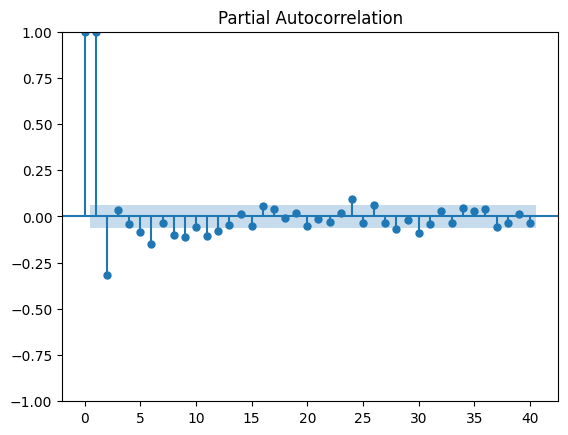

In [12]:
feature_ = data.columns.tolist()[3]

fig_pacf_individual_stats = plot_individual_pacf_stats(
    df = data, 
    feature_plot = feature_, 
    lags = 40
)

In [13]:
# save individual pacf
dpi_value = 300
fig_pacf_individual_stats.savefig("output_eda/2_univariate_analysis/pacf_individual_stats.png", dpi = dpi_value)

## PACF all features
Make a subplot of all Pacf functions generated by statsmodels

In [14]:
def plot_all_pacf_stats(df, lags, number_columns = 2):
    """
    Plot the individual PACF of ALL FEATURES of with x number of lags
    ->PACF generated by statsmodels

    Args
        df (dataframe): data. The index should be the timestamp
        lags (int): Number of lags in the PACF

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """

    ############################################################################
    # get list of features
    list_features = df.columns.tolist()
    
    
    # define number of rows with a number of columns fixed pass as parameter
    if (df.shape[1] % number_columns) != 0:
        number_rows = (df.shape[1] // number_columns) + 1 
    else:
        number_rows = (df.shape[1] // number_columns)

    
    # create subplots
    fig, axes = plt.subplots(nrows = number_rows, 
                             ncols = number_columns,
                             #figsize = (subplot_width * number_columns, subplot_height * number_rows),
                             figsize=(7*number_columns, 4*number_rows + 0),
                             tight_layout = True
                            )
    
    # add title
    #fig.suptitle("Plots of Autocorrelation", fontsize=28)  # sometimes the tittle is overlaped in the plots
    
    # add subplot for each of the features -> feature
    for index_feature, feature in enumerate(list_features):
        row = (index_feature // number_columns) #+ 1 # in matplotlib index starts in 0, in plolty starts in 1
        column = (index_feature % number_columns) #+ 1
    
        # subplot each feature
        tsaplots.plot_pacf(df[feature], lags=lags, ax=axes[row, column])
        axes[row, column].set_title(f'PACF of "{feature}"')
    
    # adjust design
    plt.subplots_adjust(top=0.95) # sup title above the subplots
    
    ############################## 

    return fig

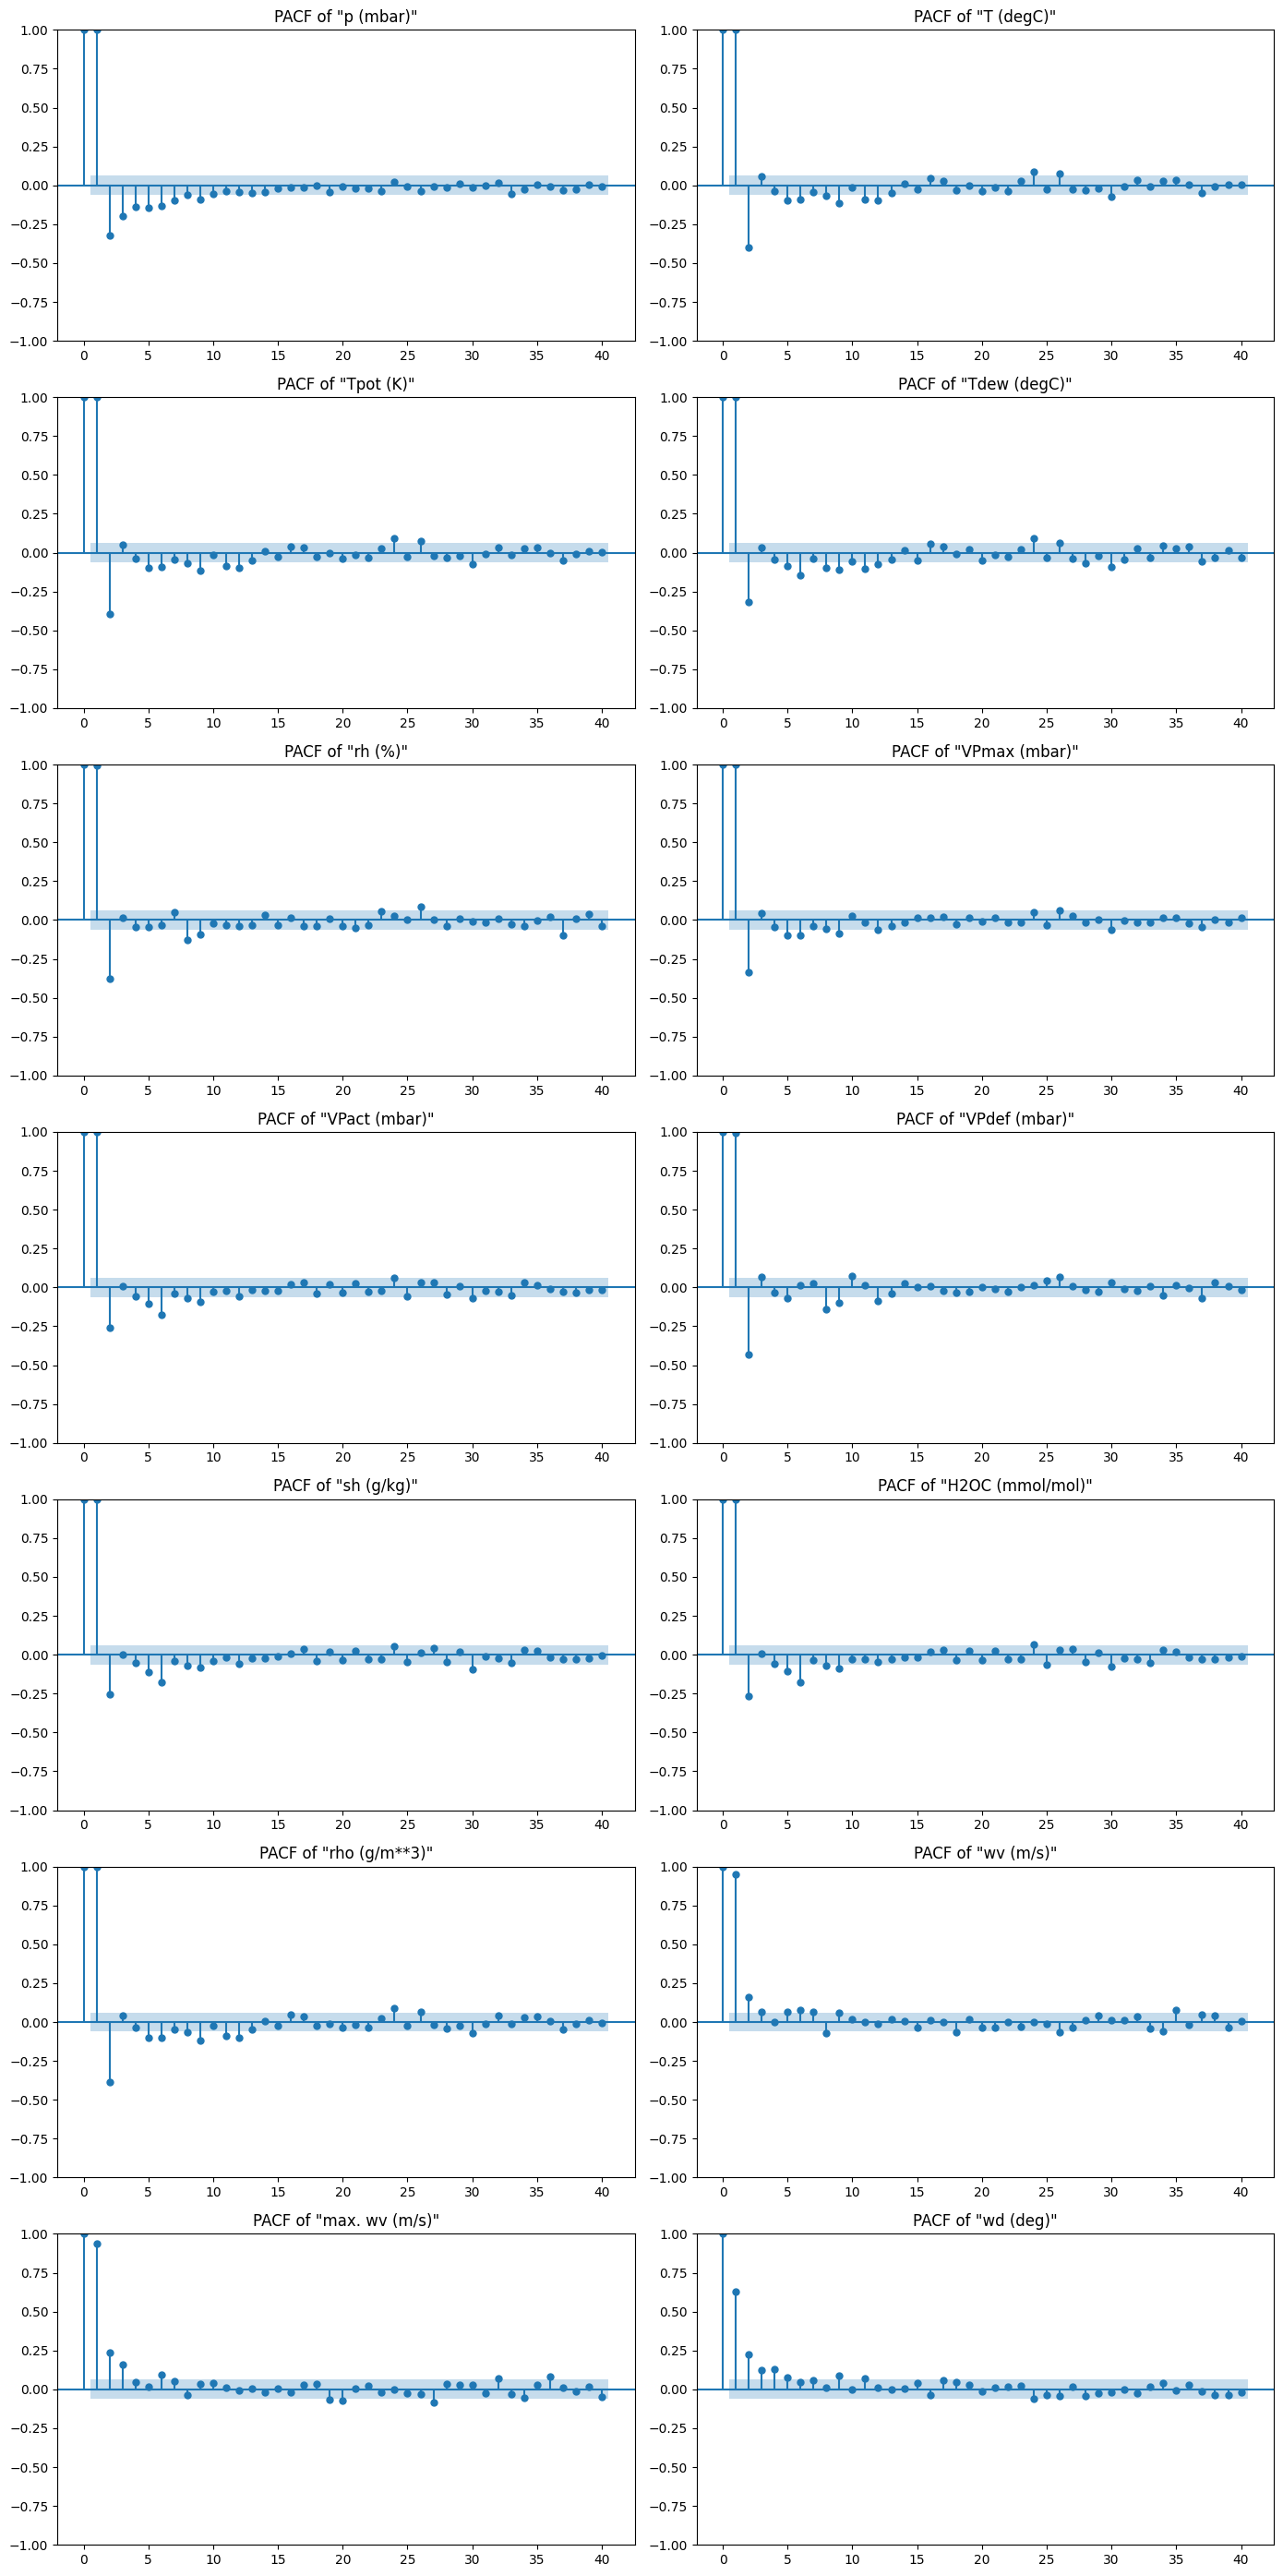

In [15]:
fig_pacf_stats = plot_all_pacf_stats(
    df = data, 
    lags = 40,
    number_columns = 2
)

In [16]:
# save figure acf
dpi_value = 300
fig_pacf_stats.savefig("output_eda/2_univariate_analysis/pacf_stats.png", dpi = dpi_value)